# Data insights for News data

In [ ]:
!pip install wordcloud

In [ ]:
!pip install nltk

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from wordcloud import WordCloud

### Records by date

In [ ]:
date = []
frequency = []
date_format = '%m/%d/%Y'

In [ ]:
with open('RecordByDates.txt', 'r') as file:
    for line in file:
        a = line.strip().split('\t')
        date.append(datetime.strptime(a[0],date_format))
        frequency.append(int(a[1]))

In [ ]:
df = pd.DataFrame({'Date': date, 'Frequency': frequency})

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Month_str'] = df['Date'].dt.strftime('%b')

In [ ]:
df

,Date,Frequency,Month,Month_str
0,2021-01-01,2,1,Jan
1,2023-01-01,235,1,Jan
2,2022-01-02,1,1,Jan
3,2023-01-02,27,1,Jan
4,2021-01-03,1,1,Jan
...,...,...,...,...
1150,2022-12-30,3,12,Dec
1151,2017-12-31,2,12,Dec
1152,2019-12-31,1,12,Dec
1153,2020-12-31,2,12,Dec


In [ ]:
sum_by_months = df.groupby(['Month','Month_str'])['Frequency'].sum()
print(sum_by_months)

Month  Month_str
1      Jan          18545
2      Feb           4691
3      Mar          26576
4      Apr          24098
5      May          16137
6      Jun          15522
7      Jul          20723
8      Aug          25889
9      Sep          21933
10     Oct          35136
11     Nov          93554
12     Dec          26986
Name: Frequency, dtype: int64


In [ ]:
type(sum_by_months)

pandas.core.series.Series

In [ ]:
avg_by_months = df.groupby(['Month','Month_str'])['Frequency'].mean()
print(avg_by_months)

Month  Month_str
1      Jan          197.287234
2      Feb           79.508475
3      Mar          260.549020
4      Apr          219.072727
5      May          169.863158
6      Jun          161.687500
7      Jul          318.815385
8      Aug          290.887640
9      Sep          233.329787
10     Oct          308.210526
11     Nov          719.646154
12     Dec          252.205607
Name: Frequency, dtype: float64


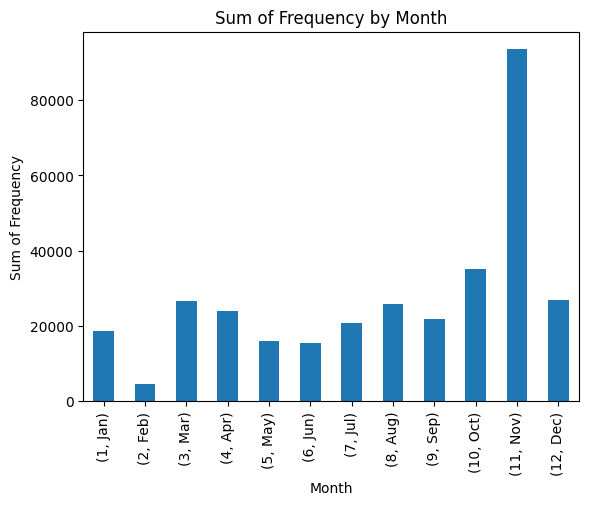

In [ ]:
sum_by_months.plot(kind='bar', x='Month_str', y='Frequency', legend=False)
plt.title('Sum of Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Sum of Frequency')
plt.show()

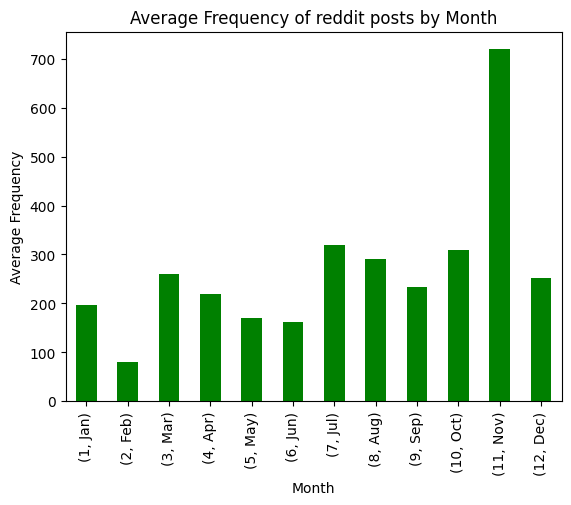

In [ ]:
avg_by_months.plot(kind='bar', x='Month_str', y='Frequency', legend=False, color='g')
plt.title('Average Frequency of reddit posts by Month')
plt.xlabel('Month')
plt.ylabel('Average Frequency')
plt.show()

In [ ]:
print(f"Total number of days: {len(date)}")

Total number of days: 1155


### Records by Source

In [ ]:
source = []
count = []

In [ ]:
with open('CountByPollsters.txt', 'r') as file:
    for line in file:
        a = line.strip().split('\t')
        source.append(a[0])
        count.append(int(a[1]))

In [ ]:
print(f"Number of sources: {len(source)}")
print(f"Number of unique sources: {len(set(source))}")

Number of sources: 103
Number of unique sources: 103


In [ ]:
df_source = pd.DataFrame({'Source':source, 'Count':count})

In [ ]:
df_source

,Source,Count
0,ABC/Washington Post,4
1,ActiVote,1
2,Alaska Survey Research,2
3,American Pulse,2
4,Beacon/Shaw,4
...,...,...
98,Wick,2
99,YouGov,67
100,YouGov Blue,2
101,Zogby,2


In [ ]:
df_sorted = df_source.sort_values(by="Count", ascending=False)
df_sorted.head()

,Source,Count
47,Morning Consult,369
23,Emerson,82
99,YouGov,67
67,Redfield & Wilton Strategies,51
20,Echelon Insights,45


In [ ]:
word_freq = dict(zip(df_sorted['Source'], df_sorted['Count']))
# word_freq

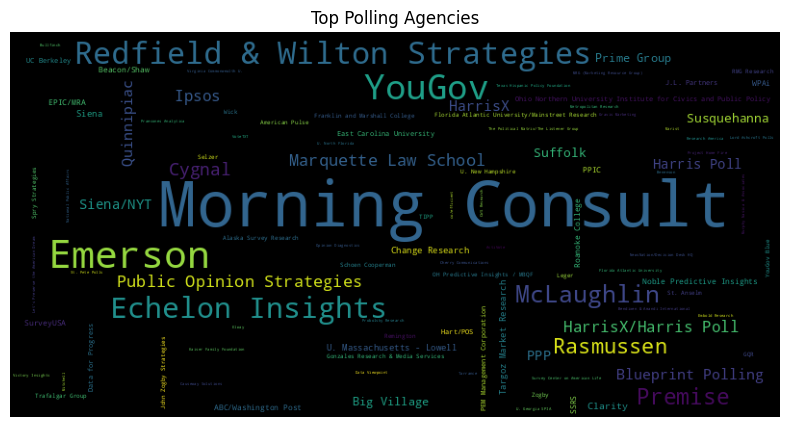

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)
# background_color='white'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top Polling Agencies')
plt.show()

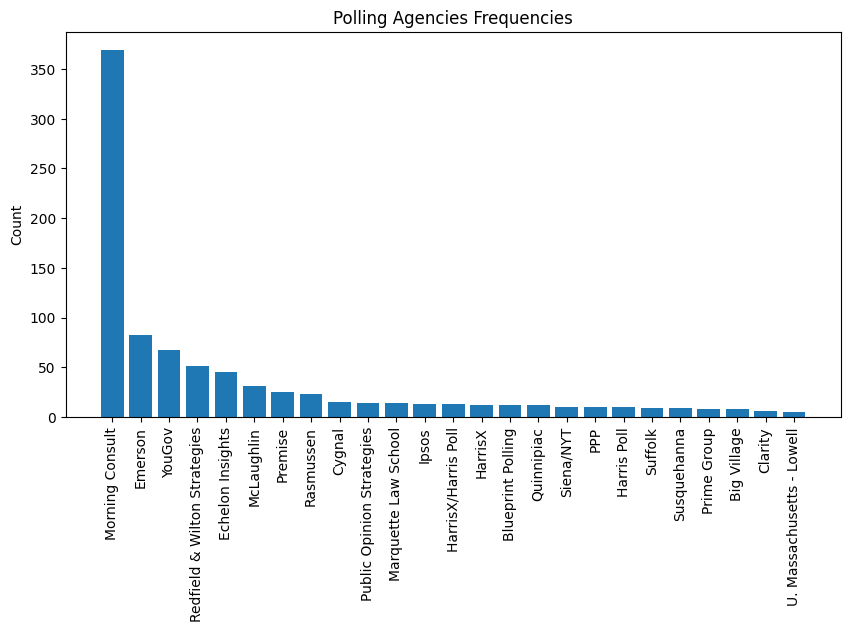

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Source'][:25],df_sorted['Count'][:25])
plt.title('Polling Agencies Frequencies')
plt.ylabel('Count')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

In [ ]:
print(f"Top 10 news sources are:")
for index, (key, value) in enumerate(word_freq.items()):
    if index < 10:
        print(key)
    else:
        break

Top 10 news sources are:
Reuters
CNN
The Associated Press
The New York Times
Financial Times
Al Jazeera English
The Washington Post
NBC News
ABC News
USA TODAY


### Tokens

In [ ]:
t = []
tc = []

In [ ]:
with open('tokens.txt', 'r') as file:
    for line in file:
        a = line.strip().split('\t')
        # print(a)
        t.append(a[0])
        tc.append(int(a[1]))

In [ ]:
print(f"Number of tokens: {len(t)}")

Number of tokens: 98214


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# filtered_words = [word for word in word_list if word.lower() not in stop_words]
indices = [i for i in range(len(t)) if t[i].lower() not in stop_words]
print(len(indices))

98073


In [ ]:
len(tc)

98214

In [ ]:
tokens = [t[i] for i in indices]
counts = [tc[i] for i in indices]

In [ ]:
df_tokens = pd.DataFrame({'Tokens':tokens, 'Counts':counts})

In [ ]:
df_tok_sorted = df_tokens.sort_values(by='Counts',ascending=False)

In [ ]:
df_tok_sorted.head(10)

,Tokens,Counts
88785,trump,63903
63864,people,48500
50285,like,42582
12082,biden,39153
96562,would,38948
27620,dont,36163
93517,vote,35915
86592,think,27940
36933,get,26767
60863,one,25471


In [ ]:
tok_freq = dict(zip(df_tok_sorted['Tokens'], df_tok_sorted['Counts']))

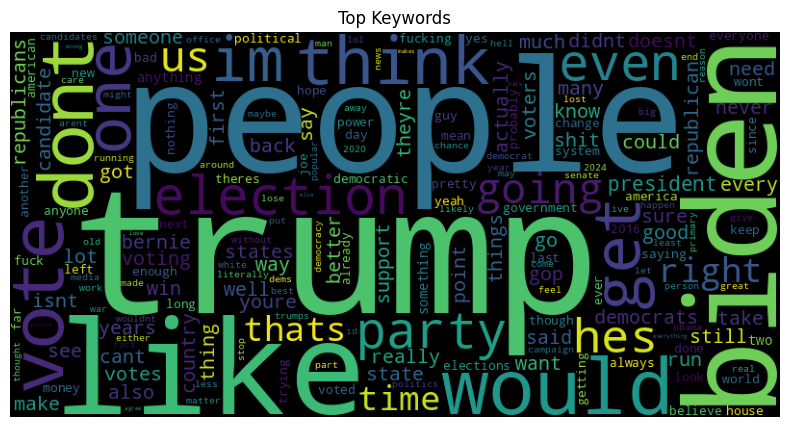

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tok_freq)
# background_color='white'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top Keywords')
plt.show()

In [ ]:
print(f"Keyword analysis: \n Trump ({tok_freq['trump']}) vs. Biden ({tok_freq['biden']}) \n Republicans ({tok_freq['republican']}) vs. Democrats ({tok_freq['democrats']})")

Keyword analysis: 
 Trump (63903) vs. Biden (39153) 
 Republicans (13096) vs. Democrats (12924)
